<a href="https://colab.research.google.com/github/Elwing-Chou/ml1206/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
path = "/content/drive/MyDrive/additional/train.zip"
f = zipfile.ZipFile(path)
f.extractall()

In [ ]:
import glob
import matplotlib.pyplot as plt
from PIL import Image
fs = glob.glob("train/*")
plt.imshow(Image.open(fs[5000]))

In [16]:
import random
import pandas as pd
dogs = glob.glob("train/dog.*")
random.shuffle(dogs)
cats = glob.glob("train/cat.*")
random.shuffle(cats)
train = pd.DataFrame({
    "path":dogs[:900] + cats[:900],
    "target":[0] * 900 + [1] * 900
})
validate = pd.DataFrame({
    "path":dogs[900:950] + cats[900:950],
    "target":[0] * 50 + [1] * 50
})
test = pd.DataFrame({
    "path":dogs[950:1000] + cats[950:1000],
    "target":[0] * 50 + [1] * 50
})

In [19]:
test

,path,target
0,train/dog.25.jpg,0
1,train/dog.4126.jpg,0
2,train/dog.7793.jpg,0
3,train/dog.12311.jpg,0
4,train/dog.7183.jpg,0
...,...,...
95,train/cat.7438.jpg,1
96,train/cat.1567.jpg,1
97,train/cat.2927.jpg,1
98,train/cat.9367.jpg,1


In [ ]:
cnn.layers

In [22]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import BatchNormalization
cnn = VGG16(include_top=False, input_shape=(224, 224, 3))
# compile前就設定好
for l in cnn.layers:
    l.trainable = False
clf = [
    # BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(2, activation="softmax")
]
model = Sequential(cnn.layers + clf)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [23]:
# 一個輸出(二元分類): BinaryCrossEntropy p log 1/q + (1 - p) log 1/1-q
# 多個輸出(多元分類): CategoricalCrossEntropy pi log1/qi
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              # "adam"也可以
              optimizer="adam",
              metrics=["accuracy"])

In [24]:
import numpy as np
x_train = np.array(train["path"])
y_train = np.array(train["target"])
x_validate = np.array(validate["path"])
y_validate = np.array(validate["target"])
x_test = np.array(test["path"])
y_test = np.array(test["target"])

(224, 224, 3)
(224, 224, 3)


array([[[[-1.3939003e+01,  1.9221001e+01, -9.6800003e+00],
         [-9.9390030e+00,  2.5221001e+01, -2.6800003e+00],
         [-9.9390030e+00,  2.9221001e+01, -6.8000031e-01],
         ...,
         [-2.3939003e+01,  4.4221001e+01,  2.0320000e+01],
         [-2.3939003e+01,  4.6221001e+01,  1.7320000e+01],
         [-9.9390030e+00,  6.2221001e+01,  2.7320000e+01]],

        [[-3.2939003e+01,  2.2210007e+00, -2.6680000e+01],
         [-4.0939003e+01, -2.7789993e+00, -3.1680000e+01],
         [-6.9390030e+00,  3.4221001e+01,  4.3199997e+00],
         ...,
         [-1.8939003e+01,  5.0221001e+01,  2.5320000e+01],
         [-1.2939003e+01,  5.6221001e+01,  2.8320000e+01],
         [-1.9390030e+00,  6.9221001e+01,  3.7320000e+01]],

        [[-3.2939003e+01,  9.2210007e+00, -2.0680000e+01],
         [-3.2939003e+01,  1.0221001e+01, -1.9680000e+01],
         [-2.5939003e+01,  1.9221001e+01, -1.1680000e+01],
         ...,
         [-1.2939003e+01,  5.8221001e+01,  3.1320000e+01],
         [

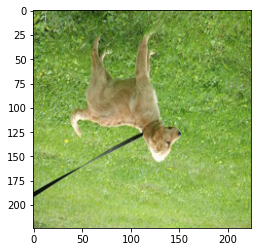

In [39]:
# !!!! x: 以前 / 255.0 -> 0~1
img = np.array(Image.open(x_train[0]).resize((224, 224)))
print(img.shape)
# 
# img[::-1, :, :]
test = img[::-1,...]
plt.imshow(test)
print(test.shape)
# !!!!!!!!
from tensorflow.keras.applications.vgg16 import preprocess_input
preprocess_input(img.reshape(1, 224, 224, 3))

In [ ]:
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input
def get_data(x, y, batch=None):
    if batch is not None:
        idx = np.random.randint(0, len(x), size=batch)
        x, y = x[idx], y[idx]
    img_pre, img_ori = [], []
    for p in x:
        img = Image.open(p).convert("RGB").resize((224, 224))
        img = np.array(img)
        img_pre.append(preprocess_input(img))
        img_ori.append(img)
    return (np.array(img_pre), np.array(img_ori), y)
x, x_ori, y = get_data(x_train, y_train, 10)
print(x.shape)
print(x_ori.shape)
print(y.shape)
# print(x)

(10, 224, 224, 3)
(10, 224, 224, 3)
(10,)


In [ ]:
xv, xv_ori, yv = get_data(x_validate, y_validate)
xt, xt_ori, yt = get_data(x_test, y_test)
print(xv.shape)
print(xt.shape)

(100, 224, 224, 3)
(100, 224, 224, 3)


In [ ]:
for i in range(50):
    x, _, y = get_data(x_train, y_train, batch=20)
    result = model.train_on_batch(x, y)
    print("train:", result)
    result = model.test_on_batch(xv, yv)
    print("validate:", result)
    print("-" * 15, i, "end", "-" * 15)

In [ ]:
pre = model.predict(xt).argmax(axis=1)
model.evaluate(xt, yt)

4/4 [==============================] - 1s 203ms/step - loss: 0.1054 - accuracy: 0.9800


[0.10536449402570724, 0.9800000190734863]

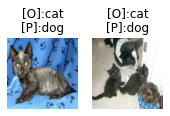

In [ ]:
import numpy as np
# 找出True(預測錯誤)的位置
idx = np.nonzero(pre != yt)[0]
idx = idx[:200]
pre_false_label = yt[idx]
pre_false_pre = pre[idx]
pre_false_img = xt_ori[idx]
# !
trans = ["dog", "cat"]
plt.figure(figsize=(15, 5))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_label[i]], trans[pre_false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

url:https://images2.gamme.com.tw/news2/2015/74/23/p56ZoKCblqWW.jpg
dog 的機率: 0.06
cat 的機率: 0.94


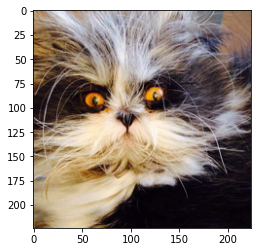

In [ ]:
import requests
# pillow
from PIL import Image
url = input("url:")
response = requests.get(url, stream=True)
img = Image.open(response.raw).convert("RGB").resize((224, 224))
img_np = np.array(img).reshape(1, 224, 224, 3)
# (32, 32, 3) -> (1, 32, 32, 3)
img_np_pre = preprocess_input(img_np)
proba = model.predict(img_np_pre)[0]
for p, n in zip(proba, trans):
    print(n, "的機率:", round(p, 3))
plt.imshow(img)